# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, more lecturing on visualization and encodings.
* In part 2, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* In part 3, we get a lightning intro to machine learning and the awesome package sklearn
* And finally, in part 4, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/zE6Nr8trdrw/0.jpg)](https://www.youtube.com/watch?v=zE6Nr8trdrw)

*Excercise 1:* Some questions about the video
>
> * Mention 10 examples of ways we can encode data.
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
> * Explain in your own words: What is the problem with pie-charts?

### Data encoding:
Some examples of data encoding are: position, pattern, shape, color, line weight, length, area, opacity, line ending, angle, texture.

Not all data encodings are equally useful. Some make it easier for our eyes to recognize patterns and other information, some confuse us and hide the true properties of the data. An example for a bad encoding is displaying data points that fall on top of each other on a dot plot. A possible solution for this is using a jitter plot as we did in a previous lecture.
The preferred choice of encoding should also depend on the nature of the data: different encoding are good at revealing different aspects of the data.

**3 encodings that are difficult to parse for the human eye:***
1. angles
2. areas
3. color

[Here](https://rigorousthemescom-ebizon.netdna-ssl.com/blog/wp-content/uploads/2021/02/screely-1612362421942.png) is a visualisation that is unclear because of the color choice.

It is difficult for our eyes to parse an angle or area based encoding of data. A pie chart mostly relies on these encodings to display information. This is why it is difficult for us to gain meaningful insight from this type of chart and why other types of visualisation can be much clearer (e.g. bar chart).

## Part 2: Exploratory data visualization, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

<span style="background-color: #FFFF00">
Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
</span><br/>
The pattern in the data is easily recognizable when plotting it as a scatter plot. No smoothing curves or approximations are needed for our eyes to confirm that there is a relationship between x and y.
<br/>

<span style="background-color: #FFFF00">
Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
</span>
<br/>
...
<br/>
<span style="background-color: #FFFF00">
What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
</span><br/>
The book mentions Spines and LOESS as methods for smoothing noisy data. 
<br/>
<span style="background-color: #FFFF00">
What are residuals? Why is it a good idea to plot the residuals of your fit?
</span><br/>
Residuals are the difference between the smoothed approximation and the actual data. By analysing residuals, we can get an idea of how close our approximation is to the real distribution (e.g. they should be trend free and balanced).
<br/>


<span style="background-color: #FFFF00">
What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
</span><br/>
Our eyes recognize change most easily if the slopes of curves are at approximately 45 degrees. Banking is the method of changing the aspect ratio of the whole plot so that most slopes are at a 45 degree angle.
Banking is not a universal solution though. If it makes a plot too skewed or makes it lose too much detail, it is probably best to rethink the entire visualization.
<br/>


<span style="background-color: #FFFF00">
Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.
</span><br/>
Graphical Analysis and Presentation Graphics both have data visualization at their core, but are vastly different activites. Gtraphical analysis is exploratory analysis, often without a known purpose. It serves to discover new information about the underlying dataset. For this reason, plots are not final and do not need to be detailed and polished.<br/>
Presentational Graphics on the other hand serves to explain some previously discovered information about data to an audience. These visualizations need to be detailed and easy to understand.
<br/>


Ok. Let's briefly talk about semi-logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover?
>    * What kind of functions will loglog plots help you see?
> * Second, we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. 
> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. 
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

Semi-log plots help us discover multiplicative relationships.
Loglog plots help us discover power-law relationships.

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
raw_data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,106.0
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Ignore outliers (locations outside the San Francisco peninsula)
SF_area_X = raw_data.loc[(raw_data["X"] < -122) & (raw_data["X"] >= -123)]
SF_area = SF_area_X.loc[(SF_area_X["Y"] >= 37) & (raw_data["X"] <= 38)]
SF_area

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,106.0
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4037801104134,40378011,4134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,06/22/2017,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,09/01/2017,17:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,06/30/2017,17:50,BAYVIEW,"ARREST, BOOKED",...,NaN,NaN,22.0,NaN,1.0,NaN,NaN,NaN,NaN,56.0
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,12/20/2017,15:41,SOUTHERN,"ARREST, BOOKED",...,3.0,1.0,3.0,7.0,2.0,1.0,1.0,1.0,35.0,21.0


In [6]:
# One degree of longitude/latitude corresponds to approximately 111 111 meters
cellsize = 100
step = 1/111111 * cellsize
def to_bin(x):
    return np.floor(x / step) * step
# Divide San Francisco into a grid
SF_area["latbin"] = to_bin(SF_area.Y)
SF_area["longbin"] = to_bin(SF_area.X)

# Group crimes into their respective grid cells
crimes_grid = SF_area.groupby(["latbin", "longbin"])
# Count the number of thefts occurring within each grid-square (all data for all time)
crimes_grid.size()

latbin     longbin    
37.707338  -122.486522    142
           -122.466722      4
           -122.464022     30
           -122.461322     31
           -122.459522     29
                         ... 
37.815338  -122.371322     54
37.816238  -122.372222      7
37.817138  -122.373122     28
37.819838  -122.374922    152
           -122.365022      2
Length: 10547, dtype: int64

In [4]:
import matplotlib.pyplot as plt

# Counting the number of areas with a specific crime count for each unique crime count number
Nk = np.unique(crimes_grid.size().values, return_counts=True)

# Plotting Nk as 3 separate plots for more visibility
fig, ax = plt.subplots(3, 1, figsize=(14, 8))
plt.tight_layout()
step = int(np.ceil(len(Nk[0])/3))
plt.suptitle("Distribution of the number of areas with a specific crime count", y=1)
ax[0].bar(x=Nk[0][0:step], height=Nk[1][0:step], width=1, align='edge')
ax[1].bar(x=Nk[0][step:2 * step], height=Nk[1][step:2 * step], width=1, align='edge')
ax[2].bar(x=Nk[0][2*step:-1], height=Nk[1][2*step:-1], width=1, align='edge')
ax[2].set_xlabel("Number of crimes in the area", labelpad=20)
ax[1].set_ylabel("Number of areas with the amount of recorded crimes", labelpad=20)
plt.show()

NameError: name 'crimes_grid' is not defined

In [7]:
# Counting the number of areas with a specific crime count for each unique crime count number
cmax = crimes_grid.size().max()

crime_nos = crimes_grid.size().values
Nk = [np.count_nonzero(crime_nos == i) for i in range(cmax + 1)]

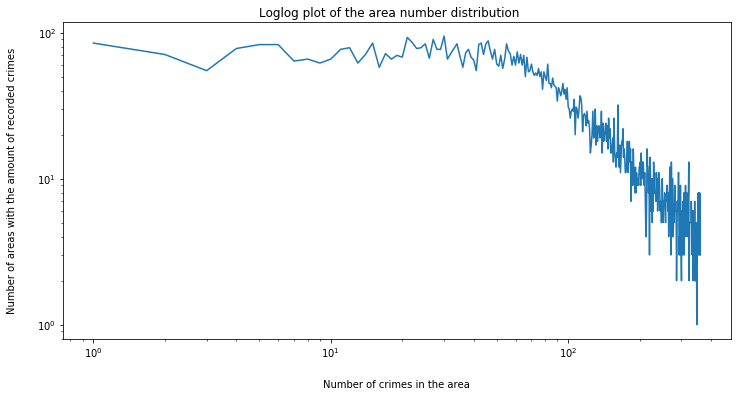

In [8]:
# Counting the number of areas with a specific crime count for each unique crime count number
Nk = np.unique(crimes_grid.size().values, return_counts=True)

# Plotting Nk as 3 separate plots for more visibility
fig, ax = plt.subplots(figsize=(10, 5))
plt.tight_layout()
step = int(np.ceil(len(Nk[0])/3))
plt.suptitle("Loglog plot of the area number distribution", y=1)
ax.loglog(Nk[0][0:step], Nk[1][0:step])
ax.set_xlabel("Number of crimes in the area", labelpad=20)
ax.set_ylabel("Number of areas with the amount of recorded crimes", labelpad=20)
plt.show()

<p><span style="background-color: #FFFF00">
Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?
</span><br/></p>
No the data does not fall onto a straight line, hence there is no power-law distribution of theft.

## Part 3: Lightning intro to Machine Learning and sklearn

Before we get to linear regression and as we are going to use a bit of Machine Learning in the following lectures too, we are going to have a quick intro to Machine Learning.

We kick off the machine-learning part by watching a video lecture on *What Machine Learning is*. The lecture (and the one in next weeks) have been prepared by our very own expert, Ole Winter, whose work focuses on Machine Learning. The lectures + slides have been prepared especially for you guys by Ole, and lovingly edited by Sune.

**What is machine learning?**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/SsCYF9tDY9Y/0.jpg)](https://www.youtube.com/watch?v=SsCYF9tDY9Y)

*Exercise 3.1* We now tie everything together (video, DAOST etc.) by answering a few questions:
> 
> * What are the different categories of Machine Learning? Where does linear regression fall in?
> * What is the difference between Machine Learning and Statistics? How does this idea connect to the purpose of linear regression according to Janert (DAOST Ch. 3)?
> * I think figure 3-14 (DAOST Ch. 3) makes an important point about linear fits that is rarely made. What is it? 
> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 get it [here](https://github.com/suneman/socialdata2022/blob/main/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).

<p><span style="background-color: #FFFF00">What are the different categories of Machine Learning? Where does linear regression fall in?</span></p>
There are 4 main categories of machine learning: supervised learning, unsupervised learning, semi-supervised learning and reinforcement learning. Regression belongs to the category of supervised learning as we have continuous output variables that we want to predict using a function.

<p><span style="background-color: #FFFF00">What is the difference between Machine Learning and Statistics? How does this idea connect to the purpose of linear regression according to Janert (DAOST Ch. 3)?</span></p>
According to Ole, machine learning is statistics without model validation. According to Janert, this connection makes linear regression the most misapplied technique in statistics. In reality, linear regression predicts values rather than summarize them, and it souldn't be used to provide the best fit.

<p><span style="background-color: #FFFF00">I think figure 3-14 (DAOST Ch. 3) makes an important point about linear fits that is rarely made. What is it?</span></p>
Linear regression does not give us the best fit on the data. This is demonstrated by figure 3-14 where it is clear that we get different results if we switch the input and output variables of our regression.
<p><span style="background-color: #FFFF00">What is problematic about using straight lines to fit the data in Fig 3-5?</span></p>
They oversimplify the data and show false trends. For example the smooth curve approximations in figure 3-5 clearly show that the finishing times for men and women are both leveling off, while the straight line model predicts that women would continue to get faster and faster at a rapid rate.

Ok, but how do we apply different machine learning models in practice? 

The amazing package `sklearn` is state-of-the-art machine learning for Python. It's used in companies big and small all over the world and in lots of academic papers.

Today, we start with a high level overview presented in [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). **Try it out**: Read/work through the first three sections (*Machine learning: the problem setting*, *Loading an example dataset*, *Learning and predicting*) to get a sense of data types and syntax.

*Exercise 3.2*: Did you read the text?
>
> * Describe in your own words how data is organized in `sklearn` (how does a *dataset* work according to the tutorial)?
> * What is the dimensionality of the `.data` part of a dataset and what is the size of each dimension?

<p><span style="background-color: #FFFF00">Describe in your own words how data is organized in sklearn (how does a dataset work according to the tutorial)?</span></p>
In sklearn, a dataset corresponds to an object. The inputs and the correct outputs are stored in different member variables: in the case of supervised learning, the .data member stores all samples with their corresponding feature values in an array, while the .target member stores the required output variables.
<p><span style="background-color: #FFFF00">What is the dimensionality of the .data part of a dataset and what is the size of each dimension?</span></p>
The .data part of the dataset is always a 2D array whose rows correspond to the samples, while the columns contain the feature values of each sample. The dimensions of the array is $samples \times features$.

## Part 4: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [6]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise 4.1*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

In [7]:
SF_area["Date"] = pd.to_datetime(SF_area["Date"], infer_datetime_format=True)
SF_area["Time"] = pd.to_datetime(SF_area["Time"], infer_datetime_format=True)

In [8]:
pairs = [(x, y) for idx, x in enumerate(focuscrimes) for y in list(focuscrimes)[idx + 1:]]
plot_data = []
for p in pairs:
    x_cat = p[0]
    y_cat = p[1]
    #print(f"{x_cat}-{y_cat}", end=', ')
    focused_x = SF_area.loc[SF_area.Category == x_cat]
    focused_y = SF_area.loc[SF_area.Category == y_cat]
    hours_of_week_x = focused_x["Date"].dt.dayofweek * 24 + focused_x["Time"].dt.hour + 1
    data_x = hours_of_week_x.value_counts().sort_index()
    hours_of_week_y = focused_y["Date"].dt.dayofweek * 24 + focused_y["Time"].dt.hour + 1
    data_y = hours_of_week_y.value_counts().sort_index()
    plot_data.append((data_x, data_y))

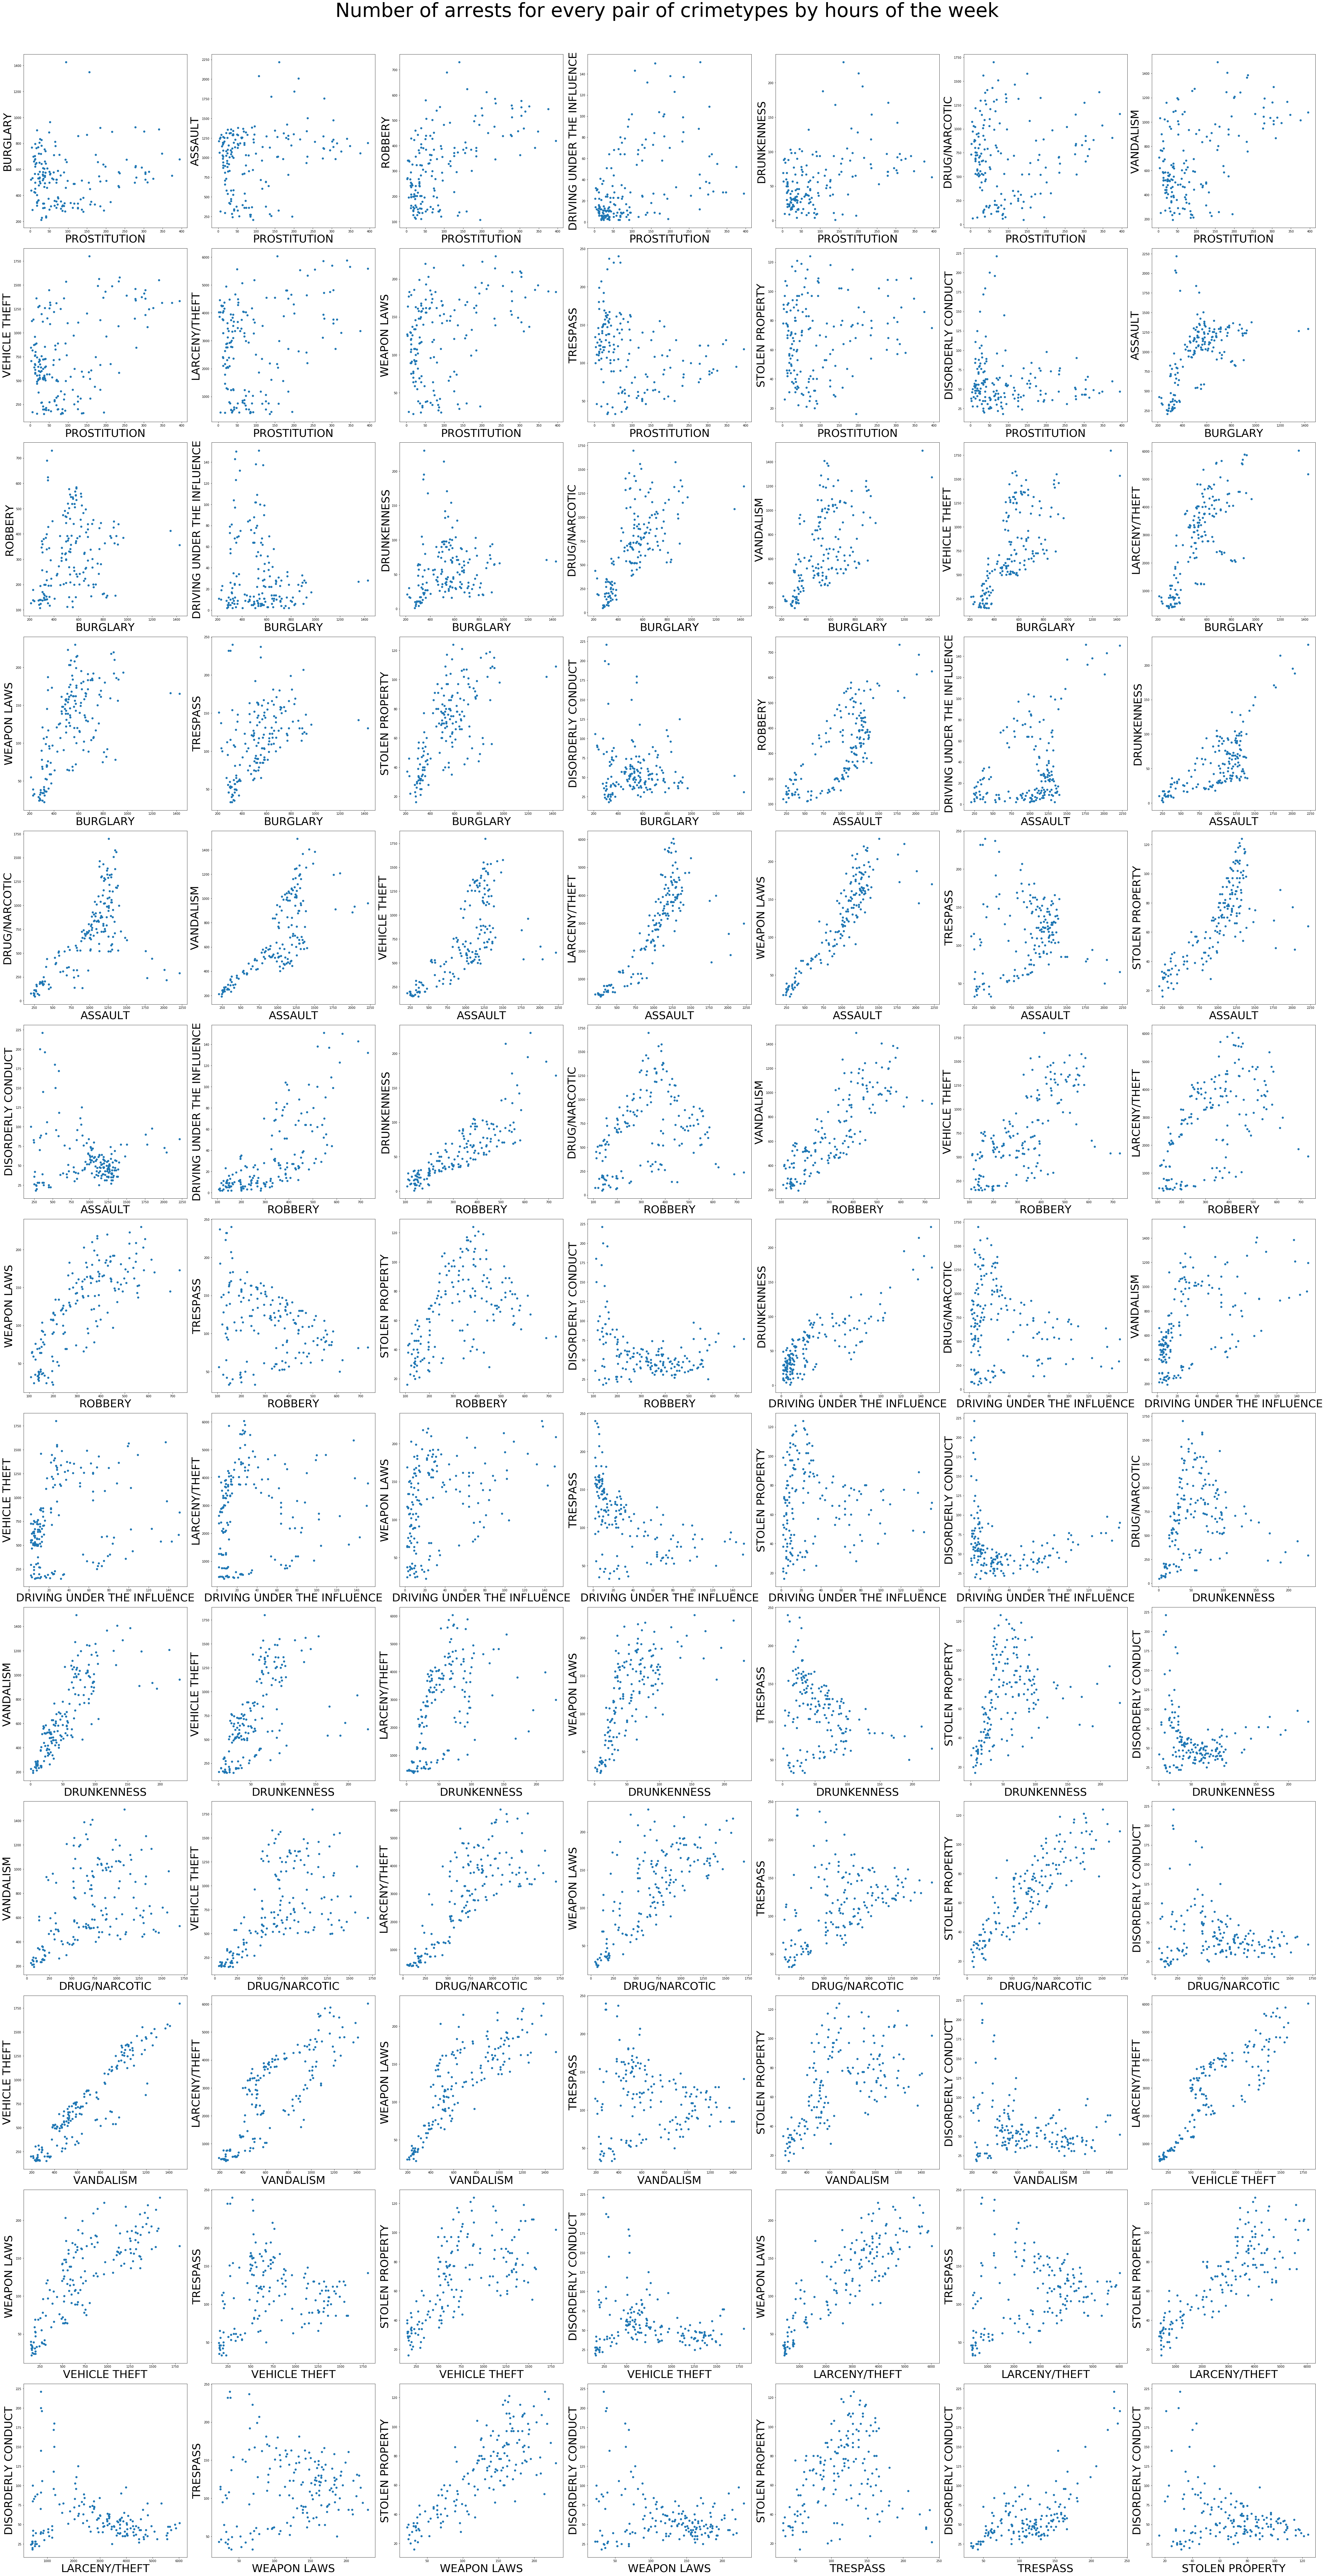

In [13]:
fig, axs = plt.subplots(13, 7, figsize=(60, 120))
fig.tight_layout(h_pad=5, w_pad=5)
for idx, p in enumerate(plot_data):
    y = idx // 7
    x = idx % 7
    subplot = axs[y, x]
    subplot.scatter(p[0], p[1])
    subplot.set_xlabel(pairs[idx][0], size=36)
    subplot.set_ylabel(pairs[idx][1], size=36)
fig.suptitle("Number of arrests for every pair of crimetypes by hours of the week", fontsize=64)
fig.subplots_adjust(top=0.96)
plt.show()

0

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, Sune actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise 4.2:* Linear regression using sklearn.
>
> * Using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn`, compute the slope and intercept for each couple of focus-crimes (from Ex. 4.1) and add a linear fit to each of the 91 scatterplots above.
> * **(Optional but highly recommended)** Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. Compare the results with the ones obtained with sklearn to check that everything is working as expected.
> * **(Optional)** You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise 4.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit, and compare it with the one provided by the function `score()` in `sklearn`.
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).